In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plotly

%matplotlib inline

plt.style.use('default')

sns.set(style='whitegrid')
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df = pd.read_csv("../data/events.csv",low_memory=False)

# Equipos utilizados

In [3]:
device = df['device_type'].value_counts().to_frame().reset_index()
device.columns = ['Equipo', 'Cant']

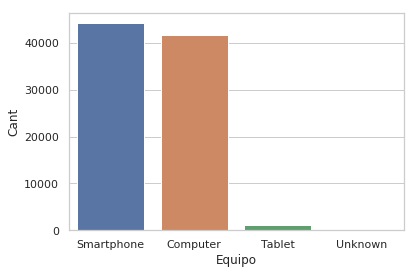

In [4]:
ax = sns.barplot(x=device['Equipo'], y=device['Cant'])
ax

In [5]:
df['search_engine'].value_counts()

Google    50240
Bing        424
Yahoo       287
Ask           6
Name: search_engine, dtype: int64

In [6]:
df['channel'].value_counts()

Paid        44193
Direct      18522
Organic     12348
Referral    11384
Social        846
Email          76
Unknown         9
Name: channel, dtype: int64

# Que sistema utilizan al entrar con un Smartphone

In [7]:
df = df[pd.notnull(df['operating_system_version'])] #Saco los null sistema
df = df[pd.notnull(df['device_type'])] #Saco los null tipo de equipo
df['operating_system_version'] = df['operating_system_version'].map(lambda x: str(x).split()[0])

In [8]:
df_types_op_smart = df.loc[df['device_type'] == 'Smartphone', 'operating_system_version'].to_frame()
df_types_op_smart = df_types_op_smart['operating_system_version'].value_counts().to_frame().reset_index()
df_types_op_smart.columns = ['Sistema','Cant']
df_types_op_smart

,Sistema,Cant
0,Android,40412
1,iOS,3303
2,Windows,497
3,Other,27


Text(0.5,1,'Sistema utilizado al entrar con un Smartphone al sitio')

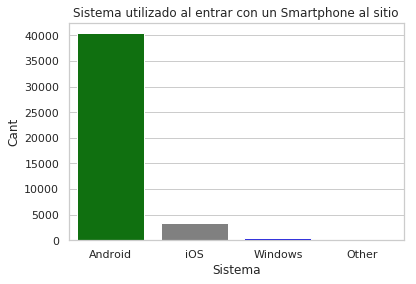

In [9]:
clrs = ['green','grey','blue','red']
ax = sns.barplot(x=df_types_op_smart.Sistema, y=df_types_op_smart.Cant, palette=clrs)
ax.set_title('Sistema utilizado al entrar con un Smartphone al sitio')

Como podíamos suponer , la gran mayoría de la gente entra con celulares que poseen un sistema operativo Android. Teniendo los celulares iphone una gran cantidad de ventas , nos preguntamos si la gente que miraba o compraba celulares de esta marca entraba usando un sistema operativo 'Andorid' o 'IOS'.
Esto nos parecia interesante ya que podíamos buscar una conformidad con el sistema de parte de los compradores. Si las mayoría de las visitas con un sistema IOS eran dirijidas a celulares como los Iphone podríamos pensar que los clientes se querían mantener con esta tecnólogia. Por otra parte, si la mayoría mirara Android, algo diferente sería conluído, y es que los usuarios estaban pensando en cambiar de sistema.
El siguiente análisis tenía además un sentido a futuro, la gente está mirando cada vez más celulares Android o IOS, a que debemos darle más importancia en la empresa?
Lamentablemente los datos no nos posibilitaron realizar este análisis, ya que toda persona que compró en el sitio no poseía los datos de sistema ingresado.
Nos pareció de todos modos algo interesante para remarcar, ya que de poseer un set de datos más completo podrí ser posible realizarlo.

# Estado de los top tres tipos de celulares más vendidos

In [10]:
df = pd.read_csv("../data/events.csv",low_memory=False)
df = df[pd.notnull(df['model'])] #Saco los null sistema
df['model'] = df['model'].map(lambda x: str(x).split()[0])
# df.loc[df['device_type'] == 'Computer', :]['model'].value_counts()
df = df.loc[df['event'] == 'conversion', :]
df['model'].value_counts()

Samsung     641
iPhone      323
Motorola    149
Sony         23
LG           20
Lenovo       14
Asus          2
Name: model, dtype: int64

In [11]:
df = df.loc[(df['model'] == 'iPhone') | (df['model'] == 'Samsung') | (df['model'] == 'Motorola'), ['model','condition']]

In [12]:
model_cond = df.groupby(['model', 'condition']).agg('size').reset_index()
model_cond.columns = ['Modelo', 'Condición', 'Cant']
model_cond

,Modelo,Condición,Cant
0,Motorola,Bom,61
1,Motorola,Excelente,39
2,Motorola,Muito Bom,49
3,Samsung,Bom,324
4,Samsung,Excelente,126
5,Samsung,Muito Bom,189
6,Samsung,Novo,2
7,iPhone,Bom,132
8,iPhone,Bom - Sem Touch ID,22
9,iPhone,Excelente,77


In [13]:
model_cond['Condición'] = model_cond['Condición'].map(lambda x: 'Bueno' if str(x) == 'Bom' else x)
model_cond['Condición'] = model_cond['Condición'].map(lambda x: 'Muy bueno' if str(x) == 'Muito Bom' else x)
model_cond['Condición'] = model_cond['Condición'].map(lambda x: 'Nuevo' if str(x) == 'Novo' else x)
model_cond['Condición'] = model_cond['Condición'].map(lambda x: 'Bueno- Sin touch ID' if str(x) == 'Bom - Sem Touch ID' else x)
model_cond

,Modelo,Condición,Cant
0,Motorola,Bueno,61
1,Motorola,Excelente,39
2,Motorola,Muy bueno,49
3,Samsung,Bueno,324
4,Samsung,Excelente,126
5,Samsung,Muy bueno,189
6,Samsung,Nuevo,2
7,iPhone,Bueno,132
8,iPhone,Bueno- Sin touch ID,22
9,iPhone,Excelente,77


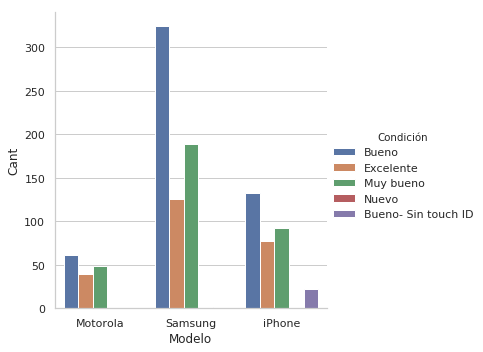

In [14]:
ax = sns.catplot(x='Modelo', y='Cant', hue='Condición', data=model_cond, kind='bar')

Aquí se puede observar algo interesante, en las tres marcas de celulares más vendidas Es estado 'Bueno' es el que tiene más ventas, seguido de muy bueno y excelente. Tiene además sentido que el estado Nuevo no tenga aparición, ya que es una compañia que se dedica a comprar celulares usados y restaurarlos para su venta.
A nivel empresa, esta información es importante, ya que pueden derivar a análisis del tipo, 
* Hasta que punto es necesario restaurar el celular que compramos?
* Es lo mismo el estado para cada modelo?

Estas preguntas, de todos modos, también pueden ser respondidas de una manera más certera teniendo además un conocimiento previo de los precio de los celulares. Ya que si la ganancia entre un celular en buen estado y muy bueno o excelente es lo suficientemente considerable para vender meno y seguir ganando más nuesrto análisis, más allá de interesante, no lograría tal vez el reducir en algunos celulares el trabajo de restauración, ya que no sería un negocio para la empresa.

# Sistema utilizado al ingresar con un Computadora

In [15]:
df = pd.read_csv("../data/events.csv",low_memory=False)
df = df[pd.notnull(df['operating_system_version'])] #Saco los null sistema
df = df[pd.notnull(df['device_type'])] #Saco los null tipo de equipo
df['operating_system_version'] = df['operating_system_version'].map(lambda x: str(x).split()[0])
df_types_op_comp = df.loc[df['device_type'] == 'Computer', 'operating_system_version'].to_frame()
df_types_op_comp['operating_system_version'] = df_types_op_comp['operating_system_version'].map(lambda x: 'Linux' if str(x) == 'Ubuntu' else x)
df_types_op_comp = df_types_op_comp['operating_system_version'].value_counts().to_frame().reset_index()
df_types_op_comp.columns = ['Sistema','Cant']
df_types_op_comp

,Sistema,Cant
0,Windows,40998
1,Mac,406
2,Linux,386


Text(0.5,1,'Sistema utilizado al entrar con una Computadora al sitio')

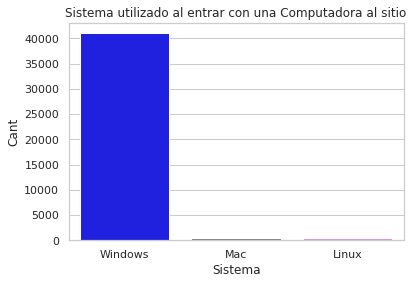

In [16]:
clrs = ['blue','grey','violet']
ax = sns.barplot(x=df_types_op_comp.Sistema, y=df_types_op_comp.Cant, palette=clrs)
ax.set_title('Sistema utilizado al entrar con una Computadora al sitio')

Se ve una muy clara preferencia a la distribución Windows al ingresar al sitio utilizando una computadora. 

In [17]:
df['screen_resolution'].value_counts().head(5)

360x640      30009
1366x768     21379
320x534       3622
1920x1080     3521
320x570       2561
Name: screen_resolution, dtype: int64

# Que miran los que compran

In [18]:
df = pd.read_csv("../data/events.csv",low_memory=False)

In [19]:
# df['operating_system_version'] = df['operating_system_version'].map(lambda x: str(x).split()[0])
df = df[pd.notnull(df['model'])] #Saco los null sistema
df['model'] = df['model'].map(lambda x: str(x).split()[0])
df.loc[df['event'] == 'conversion', :].head()


,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
220,2018-03-20 17:46:12,conversion,00204059,NaN,3084.0,Motorola,Muito Bom,32GB,Couro Vintage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2282,2018-04-26 22:28:53,conversion,00c13dee,NaN,6650.0,Samsung,Muito Bom,4GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2547,2018-06-10 14:37:50,conversion,00fdbb4b,NaN,3348.0,Samsung,Muito Bom,32GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4245,2018-03-16 13:50:25,conversion,0146a9df,NaN,2694.0,iPhone,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6985,2018-02-09 22:07:07,conversion,01db2fe6,NaN,6357.0,Samsung,Bom,16GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
frame = df.groupby(['person', 'model']).agg('size').reset_index()
frame.columns = ['person', 'model', 'cant']
frame = frame.groupby('person', group_keys=False).apply(lambda x: x.loc[x.cant.idxmax()])

In [21]:
pd.merge(df, frame, on='person').head()

/home/alawichu/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: FutureWarning:

'person' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



,timestamp,event,person,url,sku,model_x,condition,storage,color,skus,...,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,model_y,cant
0,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone,2
1,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone,2
2,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Samsung,2
3,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338.0,Samsung,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Samsung,2
4,2018-04-09 20:13:14,viewed product,000a54b2,NaN,12661.0,Motorola,Muito Bom,32GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone,17


Como antes fue mencionado, no se logro ver el tipo de equipo que utilizan las personas que compraron un equipo en el sitio

# Colores 

In [22]:
df = pd.read_csv("../data/events.csv",low_memory=False)

In [23]:
colors = df['color'].value_counts().head(10).to_frame().reset_index()
colors.columns = ['Color','Cant']
colors

,Color,Cant
0,Preto,132960
1,Dourado,114212
2,Cinza espacial,65877
3,Branco,54755
4,Prateado,50940
5,Ouro Rosa,33349
6,Prata,18446
7,Rosa,16825
8,Preto Matte,15700
9,Azul,8751


In [24]:
dic = {
    'Preto': 'Negro',
    'Dourado': 'Dorado',
    'Branco': 'Blanco',
    'Prata': 'Plata',
    'Preto Matte' : 'Negro Mate',
    'Ouro Rosa':'Rosa Claro',
    'Cinza espacial': 'Gris',
    'Prateado':'Plateado'   
}

colors['Color'] = colors['Color'].map(lambda x: x if not str(x) in dic else dic[str(x)])
colors

,Color,Cant
0,Negro,132960
1,Dorado,114212
2,Gris,65877
3,Blanco,54755
4,Plateado,50940
5,Rosa Claro,33349
6,Plata,18446
7,Rosa,16825
8,Negro Mate,15700
9,Azul,8751


Se puede observar una clara preferencia por los tipos de colores negro, gris y plateado.  Este tipo de información, como dijimos ya ates, sirve para elegir que tipo de equipo se va  a comprar para posteriormente vender. Tal vez un celular que sabemos que tiene muchas ventas se venderá no importe el color, pero uno de más bajo mercado, si merece posiblemente tener en cuenta estos pequeños detalles, como el color.